In [1]:
import numpy as np
from scipy.sparse.linalg import eigs
from numpy import linalg as LA
from scipy.interpolate import Akima1DInterpolator
from scipy.linalg import expm
import time
from scipy import sparse
import matplotlib.pyplot as plt
import scipy
np.set_printoptions(precision=6)
# initialize variables
N = 8
# Q is the dimension
Q = pow(2, N)

# decimal number to binary array function
def D2B(num):
    string = f'{num:1b}'
    result = np.zeros(N - len(string), int)

    for ele in string:
        result = np.append(result, int(ele))

    return result

# decimal number to binary array function
def D2B_with_digit(num,digit):
    string = f'{num:1b}'
    result = np.zeros(digit - len(string), int)

    for ele in string:
        result = np.append(result, int(ele))

    return result

# binary array to decimal function
def B2D(array):
    res = 0
    for ele in array:
        res = (res << 1) | ele
    return res

def spin_reflection(array):
    new_array = np.zeros(len(array),dtype=int)
    for i in range(len(array)):
        if array[i] == 1:
            new_array[i] = 0
        else:
            new_array[i] = 1
    return new_array

def spatial_reflection(array):
    new_array = array[::-1]
    return new_array

# start my main function

# initialize J matrix
J_matrix = np.zeros((N, N), dtype='float64')
J_value = 1
J_matrix_alpha = 1   # !!! NEED TO BE CHANGED
for i in range(N):
    for j in range(N):
        if j >= (i + 1):
            J_matrix[i][j] = J_value/pow(abs(i-j),J_matrix_alpha)

In [2]:
# start to get what product states are having the same symmtries
loop_state_list = np.linspace(0,Q-1,num=Q,dtype=int)

couple_state_matrix = []
sign_matrix = []
# this is the final result for the states to consctruct basis 

for n in range(Q):  # n is an unused index
    
    # couple_num_list would be my result for each state we loop
    
    if len(loop_state_list)!=0: # loop for couple number for one state
                
        couple_num_list = [] # this is the list to store all the number that couple to the number we are looping
        couple_num_list = np.array(couple_num_list, dtype=int)
        state_num = loop_state_list[0]
        couple_num_list = np.append(couple_num_list,state_num)
        
        for m in range(Q): # loop for spin and spatial for all states inside the couple number list
            
            if m==0:
                
                couple_num_list_old =couple_num_list
                
                for i in range(len(couple_num_list)):
                    number = couple_num_list[i]
                    array = D2B(number)

                    # spin reflection 
                    spin_relfection_array = spin_reflection(array)
                    spin_number = B2D(spin_relfection_array)
                    couple_num_list =np.append(couple_num_list,spin_number)



                    # spatial reflection 
                    spatial_relfection_array = spatial_reflection(array)
                    spatial_number = B2D(spatial_relfection_array)
                    couple_num_list =np.append(couple_num_list,spatial_number)
                    
                    # remove the repeated element 
                    couple_num_list = np.unique(couple_num_list)
            else:
                
                if len(couple_num_list_old) != len(couple_num_list):
                    # update couple_num_list_old first 
                    couple_num_list_old =couple_num_list
                    
                    for i in range(len(couple_num_list)):
                        number = couple_num_list[i]
                        array = D2B(number)

                        # spin reflection 
                        spin_relfection_array = spin_reflection(array)
                        spin_number = B2D(spin_relfection_array)
                        couple_num_list =np.append(couple_num_list,spin_number)
                        
                        
                        # spatial reflection 
                        spatial_relfection_array = spatial_reflection(array)
                        spatial_number = B2D(spatial_relfection_array)
                        couple_num_list = np.append(couple_num_list,spatial_number)
                        
                        # remove the repeated element 
                        couple_num_list = np.unique(couple_num_list)
                        
        # now we have final couple_num_list
        couple_state_matrix.append(couple_num_list.tolist())
        
        # remove the ones already found 
        for j in range(len(couple_num_list)):
            loop_state_list = np.delete(loop_state_list, np.where(loop_state_list ==couple_num_list[j] ))

            


In [3]:
# # now we want to decide the sign for each term 

# for i in range(len(couple_state_matrix)):
# #for i in range(1,2):
    
#     state_num = couple_state_matrix[i]
#     #print(state_num)
    
#     # get spin & spatial reflection array without sign
#     spin_num_array = np.zeros(len(state_num),dtype=int)
#     spatial_num_array = np.zeros(len(state_num),dtype=int)
    
#     for j in range(len(state_num)):
        
#         array = D2B(state_num[j])

#         # spin reflection 
#         spin_relfection_array = spin_reflection(array)
#         spin_number = B2D(spin_relfection_array)
#         spin_num_array[j] = spin_number
#         #print(spin_num_array)
        
#         # spatial reflection 
#         spatial_relfection_array = spatial_reflection(array)
#         spatial_number = B2D(spatial_relfection_array)
#         spatial_num_array[j] = spatial_number
#         #print(spatial_num_array)

    
#     # loop all possbie sign        
        
#     state_number_length = len(state_num) 
#     for j in range( pow(2,state_number_length) ):
        
#         sign_array = D2B_with_digit(j,state_number_length)
        
#         # convert it into 1 or -1
        
#         for k in range(len(sign_array)):
#             # the choice for sign here does not matter since we only the right + and -, what number it's is fine 
#             if sign_array[k] == 1:
#                 sign_array[k] = -1
#             else:
#                 sign_array[k] = 1
                
#         # combine signs on the reflection array sort is for comparison only 
        
#         temp_spin_num = spin_num_array * sign_array
#         temp_spin_num = np.sort(temp_spin_num)
#         #print(temp_spin_num)
        
#         temp_spatial_num = spatial_num_array * sign_array
#         temp_spatial_num =np.sort(temp_spatial_num)
        
#         # combine the sign for the orginal state number array
        
#         #temp_spin_b4_num = state_num * sign_array * -1   # this one is for odd parity 
#         temp_spin_b4_num = state_num * sign_array  
#         temp_spin_b4_num = np.sort(temp_spin_b4_num)

#         #temp_spatial_b4_num = state_num * sign_array * -1 # this one is for odd parity
#         temp_spatial_b4_num = state_num * sign_array
#         temp_spatial_b4_num = np.sort(temp_spatial_b4_num)
        
        
#         # check the parity here 
#         if np.array_equal(temp_spin_num,temp_spin_b4_num):

#             if np.array_equal(temp_spatial_num,temp_spatial_b4_num):
#                 if sign_array[0]==1: # just so to pick out the positive ones since all negatives would also work
#                     sign_matrix.append(sign_array.tolist())
                    
#         # if not np.array_equal(temp_spin_num, state_num) and not np.array_equal(temp_spatial_num, state_num):
#         #     sign_matrix.append(sign_array.tolist())                    

In [4]:
# initialize H matrix
couple_dimen = len(couple_state_matrix)

HA_matrix = np.zeros((couple_dimen, couple_dimen), dtype='float64')
HB_matrix = np.zeros((couple_dimen, couple_dimen), dtype='float64')

In [5]:
couple_dimen

72

In [6]:
# loop each basis to fill in the diagonal elements for HA matrix 

for i in range(couple_dimen):
    
    state_array = np.array( couple_state_matrix[i] )
    
    # loop each element inside the array 
    normalization = len(state_array)
    
    # energy total for all the product states inside one basis
    
    e_tot = 0
    for j in range(len(state_array)):
        
        state = D2B(state_array[j])
        
        # loop over N sites to change the state vector to either 1 or -1
        
        for k in range(N):
            # 1 is spin down , 0 is spin up
            if state[k] == 1:
                state[k] = -1
            else:
                state[k] = 1

        # now get the energy, loop all the sites and then pairs
        
        for m in range(N):
            for q in range(N):
                e_temp = J_matrix[m][q] * state[m] * state[q]
                e_tot = e_tot + e_temp

    HA_matrix[i][i] = e_tot/normalization

In [7]:
# generate vector form for each basis
vector_form_basis_matrix = np.zeros((couple_dimen,Q))

for i in range(couple_dimen):
    
    state_array = np.array( couple_state_matrix[i] )
    normalization = np.sqrt(len(state_array))
    
    for j in state_array:
        vector_form_basis_matrix[i][j] = 1
        
    # put back normalization factor
    vector_form_basis_matrix[i] = vector_form_basis_matrix[i]/normalization
    
    

In [8]:
# loop each basis to fill in HB matrix 

for i in range(couple_dimen):

    state_array = np.array( couple_state_matrix[i] )

    # this is the actual normalization unlike before since it will couple to some other states
    # so it can not be like just the square like we did before
    normalization = np.sqrt(len(state_array))

    # loop each product state to generate N other states, i.e. generaete the state after operator acting on it
    result_num_list = []
    result_num_list = np.array(result_num_list,dtype=int)
    for k in range(len(state_array)):
        
        spin = D2B(state_array[k])

        # start fliping the spins
        for j in range(N):
            if spin[j] == 1:
                # if it's spin down, raise to spin up
                spin[j] = 0
                new_num = B2D(spin)
                result_num_list = np.append(result_num_list,new_num)
                # change it back for next operation
                spin[j] = 1
            else:
                # if it's spin down, raise to spin up
                spin[j] = 1
                new_num = B2D(spin)
                result_num_list = np.append(result_num_list,new_num)
                # change it back for next operation
                spin[j] = 0
        
     
    # generate the vector form for the state after operrator acting on it
    
    vector_final_state = np.zeros(Q)
    
    for j in result_num_list:
        vector_final_state[j] = vector_final_state[j] +1
        
    # put back normalization factor 
    vector_final_state = vector_final_state/normalization
    
    # calculate dot product to put into inside the matrix
    for j in range(couple_dimen):
        
        dot_product = np.dot(vector_final_state,vector_form_basis_matrix[j])
        HB_matrix[i][j] = dot_product

In [9]:
# get true ground state 
B = 0.1   # !!! NEED TO BE CHANGED
w, v = LA.eigh(HA_matrix + B* HB_matrix)
inx = np.argsort(w)
true_gs_vec = v[:, inx[0]]
true_gs_energy =w[0]
E_max =w[-1]

In [10]:
true_gs_energy

-5.110650491789136

In [11]:
# get  ground state with numerically infinite large B field
w, v = LA.eigh(HB_matrix)
inx = np.argsort(w)
temp_vec = v[:, inx[0]] # the index here could be zero or one, depending on the parity
# but if the wrong index will always give roughly zero fidelity 

In [12]:
# get fidelity for t= 0s
fidelity_t_0 = pow(np.dot(true_gs_vec,temp_vec),2) # all real so no need to cc
print(fidelity_t_0)

0.016242148889510737


In [13]:
def get_energy(H_matrix,state):
    
    a = np.dot(H_matrix,state)
    energy = np.dot(np.conjugate(state),a).real
    
    return energy

In [14]:
def get_fidelity(gs,state):

    dp = np.dot(gs,state) # dp is dot product
    #print(dp)
    dp_cc = np.conjugate(dp)     # the complex conjucate of the dot product 
    return (dp*dp_cc).real

In [15]:
target_H = np.copy(HA_matrix + B* HB_matrix)

In [16]:
def lambda_evolve(x):
    # global fidelity
    # final_fidelity_list =[]
    # final_fidelity_list.append(fidelity_t_0)
    # product state
    p = temp_vec  # p stands for product
     # loop each time step
    for i in range(number_of_layers):
        H_matrix = HA_matrix + x[i+number_of_layers]*HB_matrix
        exp_imgH_matrix = expm( -1*1j*x[i]*H_matrix )
        new_p = np.dot(exp_imgH_matrix,p)
        # update state
        p = new_p
        
    # get fidelity 
    # fidelity = get_fidelity(true_gs_vec,p)
    #print('fidelity is ',fidelity)
    # get energy
    energy = get_energy(target_H,p)
    #return -1*fidelity
    return energy

In [17]:
def lambda_evolve_fidelity(x):
    p = temp_vec  # p stands for product
     # loop each time step
    for i in range(number_of_layers):
        H_matrix = HA_matrix + x[i+number_of_layers]*HB_matrix
        exp_imgH_matrix = expm( -1*1j*x[i]*H_matrix )
        new_p = np.dot(exp_imgH_matrix,p)
        # update state
        p = new_p
        
    # get fidelity 
    fidelity = get_fidelity(true_gs_vec,p)
    return fidelity

In [18]:
def extract_selected_results_from_file(filename):
    results = {
        "nit": [],
        "nfev": [],
        "fidelity": [],
        "message": [],
        "success": []
    }

    with open(filename, 'r') as f:
        for line in f:
            if line.startswith("message:"):
                results["message"].append(line.split("message: ")[1].strip())
            elif line.startswith("success:"):
                results["success"].append(line.split("success: ")[1].strip() == "True")

            for key in results.keys():
                if key in ["nit", "nfev", "fidelity"]:
                    if line.startswith(f"{key}:"):
                        value = line.split(f"{key}: ")[1].strip()
                        if key == "nit" or key == "nfev":
                            value = int(value)
                        elif key == "fidelity":
                            value = float(value)
                        results[key].append(value)

    # Filter results for successful runs
    success_indices = [i for i, s in enumerate(results["success"]) if s]
    success_results = {
        "nit": [results["nit"][i] for i in success_indices],
        "nfev": [results["nfev"][i] for i in success_indices],
        "fidelity": [results["fidelity"][i] for i in success_indices],
        "message": [results["message"][i] for i in success_indices]
    }

    # Count the number of successful runs
    num_success = sum(results["success"])

    # Count the total number of optimization reports
    total_reports = len(results["success"])

    return success_results, num_success, total_reports

# Example usage
# success_results, num_success, total_reports = extract_selected_results_from_file(f'scipy_lambda_B_convergence_result_N={N}_B={B}_layers_{10}.txt')
# print(f"Number of successful runs: {num_success}")
# print(f"Total number of optimization reports: {total_reports}")
# print('success rate',num_success/total_reports)

In [19]:
# # Define the layers you want to iterate over
# layers_list = [10, 20, 50, 80]

# # Initialize lists to store results
# fidelity_lists = []
# nit_lists = []
# nfev_lists = []

# for layers in layers_list:
#     # Generate file name based on current layers value, that is the the original file but too large to fit into the data repository
#     filename = f'scipy_lambda_B_convergence_result_N={N}_B={B}_layers_{layers}.txt'
    
#     # Extract results for current layers value
#     success_results, num_success, total_reports = extract_selected_results_from_file(filename)
    
#     # Append lists for current layers value
#     fidelity_lists.append(success_results["fidelity"])
#     nit_lists.append(success_results["nit"])
#     nfev_lists.append(success_results["nfev"])

# import csv

# # File name to save the data
# output_filename = 'convergence_results_output.csv'

# # Combine the lists into rows
# data = list(zip(layers_list, fidelity_lists, nit_lists, nfev_lists))

# # Write data to a CSV file
# with open(output_filename, mode='w', newline='') as file:
#     writer = csv.writer(file)
    
#     # Write header
#     writer.writerow(['Layers', 'Fidelity', 'Nit', 'Nfev'])
    
#     # Write the rows
#     for row in data:
#         writer.writerow(row)

# print(f"Data saved to {output_filename}")



In [20]:
import csv

# File name to read the data from
input_filename = 'convergence_results_output.csv'

# Initialize lists to store the read data
layers_list = []
fidelity_lists = []
nit_lists = []
nfev_lists = []

# Read data from the CSV file
with open(input_filename, mode='r') as file:
    reader = csv.reader(file)
    
    # Skip the header
    next(reader)
    
    # Read the rows
    for row in reader:
        layers_list.append(int(row[0]))       # Convert layers to integer
        fidelity_lists.append(eval(row[1]))   # Convert back to appropriate type
        nit_lists.append(eval(row[2]))        # Convert back to appropriate type
        nfev_lists.append(eval(row[3]))       # Convert back to appropriate type

print("Data successfully read and stored in original variables.")


Data successfully read and stored in original variables.


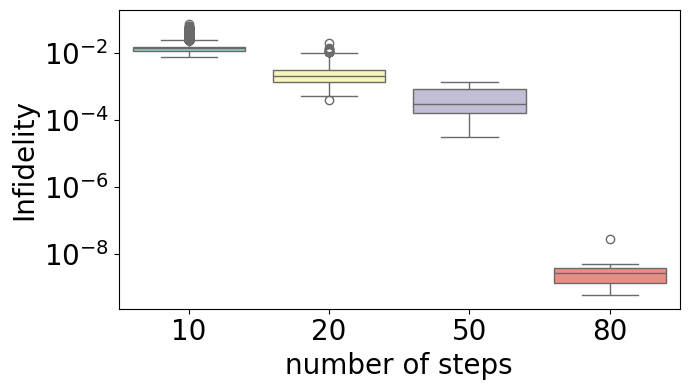

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate infidelity from fidelity_lists
infidelity_flat = [1 - item for sublist in fidelity_lists for item in sublist]

# Create a list to repeat layers for corresponding infidelity values
layers_flat = []
for i, sublist in enumerate(fidelity_lists):
    layers_flat.extend([layers_list[i]] * len(sublist))

# Create a figure and axis
plt.figure(figsize=(7, 4))  # Adjust size as needed
ax = sns.boxplot(x=layers_flat, y=infidelity_flat, hue=layers_flat, palette="Set3", dodge=False,log_scale=True)

# Set labels and title
ax.set_xlabel('number of steps', fontsize=20)
ax.set_ylabel('Infidelity', fontsize=20)
# ax.set_title('Infidelity Boxplot for Different Layers', fontsize=20)


# Set y-axis to semilog scale
ax.set_yscale('log')

# Set tick parameters
ax.tick_params(axis='both', which='major', labelsize=20)

# Remove legend since hue is not needed here
ax.legend_.remove()
plt.tight_layout()
plt.savefig('fidelity_boxplot')
# Show plot
plt.show()

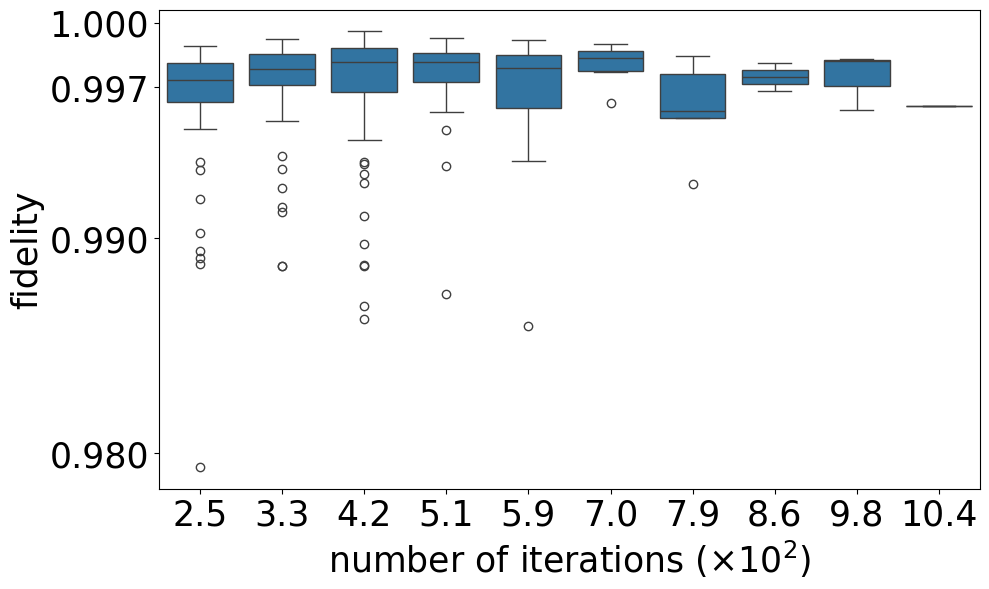

In [22]:
which_layer =1
nfev_list = nit_lists[which_layer] 
fidelity_list = fidelity_lists[which_layer]
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming nfev_list and fidelity_list are already defined
# Binning the data
font_size = 25
bins = np.linspace(np.min(nfev_list), np.max(nfev_list), 10)
bin_labels = np.digitize(nfev_list, bins)

# Creating a DataFrame for easier plotting with Seaborn
data = pd.DataFrame({'nfev': nfev_list, 'fidelity': fidelity_list, 'bin': bin_labels})

# Filter out any bins with no data
data = data.groupby('bin').filter(lambda x: len(x) > 0)

# Calculate the mean of nfev for each bin
bin_means = data.groupby('bin')['nfev'].mean().values

# Determine the common exponent
common_exponent = int(np.floor(np.log10(np.mean(bin_means))))
bin_means /= 10 ** common_exponent

# Custom function to format labels without the exponent
def format_coefficient(value):
    return f'{value:.1f}'

# Apply the custom function to all bin means
bin_means_labels = [format_coefficient(mean) for mean in bin_means]

plt.figure(figsize=(10, 6))
sns.boxplot(x='bin', y='fidelity', data=data, showfliers=True)

plt.xticks(ticks=np.arange(len(bin_means_labels)), labels=bin_means_labels, rotation=0, fontsize=25)

plt.xlabel(f'number of iterations ($\\times 10^{{{common_exponent}}}$)', fontsize=font_size)
plt.ylabel('fidelity', fontsize=font_size)
plt.yticks([0.98, 0.99, 0.997, 1], fontsize=font_size)

plt.tight_layout()
plt.savefig('Iteration_vs_fidelity_20_layers_boxplot.png')
plt.show()


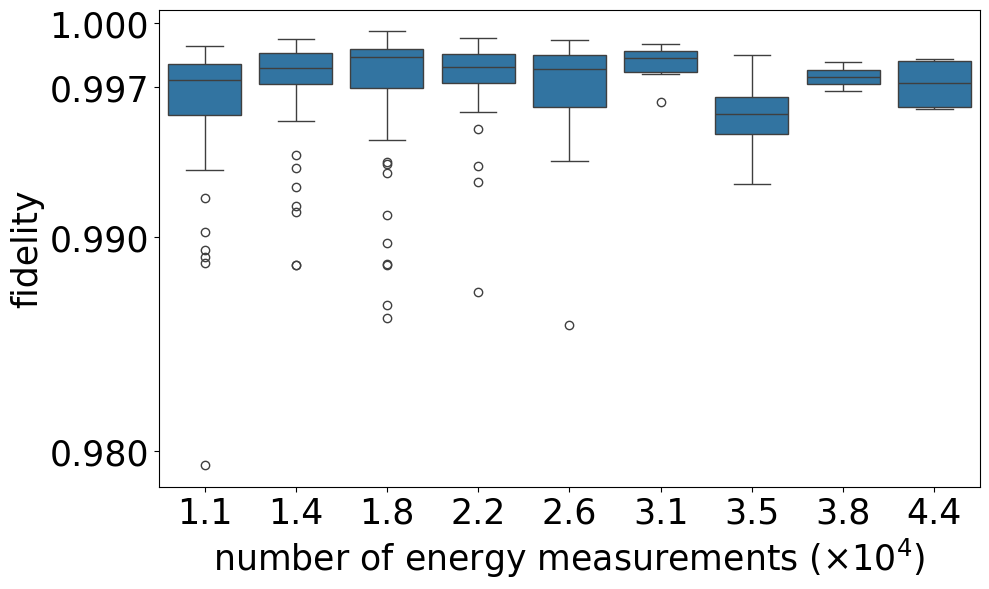

In [23]:
which_layer =1
nfev_list = nfev_lists[which_layer] 
fidelity_list = fidelity_lists[which_layer]
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming nfev_list and fidelity_list are already defined
# Binning the data
font_size = 25
bins = np.linspace(np.min(nfev_list), np.max(nfev_list) + 100, 10)
bin_labels = np.digitize(nfev_list, bins)

# Creating a DataFrame for easier plotting with Seaborn
data = pd.DataFrame({'nfev': nfev_list, 'fidelity': fidelity_list, 'bin': bin_labels})

# Filter out any bins with no data
data = data.groupby('bin').filter(lambda x: len(x) > 0)

# Calculate the mean of nfev for each bin
bin_means = data.groupby('bin')['nfev'].mean().values

# Determine the common exponent
common_exponent = int(np.floor(np.log10(np.mean(bin_means))))
bin_means /= 10 ** common_exponent

# Custom function to format labels without the exponent
def format_coefficient(value):
    return f'{value:.1f}'

# Apply the custom function to all bin means
bin_means_labels = [format_coefficient(mean) for mean in bin_means]

plt.figure(figsize=(10, 6))
sns.boxplot(x='bin', y='fidelity', data=data, showfliers=True)

plt.xticks(ticks=np.arange(len(bin_means_labels)), labels=bin_means_labels, rotation=0, fontsize=25)

plt.xlabel(f'number of energy measurements ($\\times 10^{{{common_exponent}}}$)', fontsize=font_size)
plt.ylabel('fidelity', fontsize=font_size)
plt.yticks([0.98, 0.99, 0.997, 1], fontsize=font_size)

plt.tight_layout()
plt.savefig('measurement_vs_fidelity_20_layers_boxplot.png')
plt.show()
